In [61]:
import pandas as pd
import numpy as np


# Reading in data
* Seperators / delims
* quote chars
* Headers
* date times


In [62]:
# Do this live... Start with google for 
df = pd.read_csv('data/dirty_data_from_w3.csv')
df.head()

,index Duration Date Pulse Maxpulse Calories
0,0 60 '2020/12/01' 110 130 409.1
1,1 60 '2020/12/02' 117 145 479.0
2,2 60 '2020/12/03' 103 135 340.0
3,3 45 '2020/12/04' 109 175 282.4
4,4 45 '2020/12/05' 117 148 406.0


In [63]:
df = pd.read_csv('data/dirty_data_from_w3.csv', sep=' ')
df.head()

,index,Duration,Date,Pulse,Maxpulse,Calories
0,0,60,'2020/12/01',110,130,409.1
1,1,60,'2020/12/02',117,145,479.0
2,2,60,'2020/12/03',103,135,340.0
3,3,45,'2020/12/04',109,175,282.4
4,4,45,'2020/12/05',117,148,406.0


# Timestamps aka datetime Objects

In [64]:
# ERROR ON LINE 26 OF FILE... 
df['datetime_object'] = pd.to_datetime(df['Date'])
df.head()


ValueError: time data "2020/12/26" doesn't match format "'%Y/%m/%d'", at position 26. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [74]:
# THIS IS BECAUSE LIKE 27 DOES NOT HAVE QUOTES "" AROUND THIS. 
# SO MANY WAYS TO FIX ITS,  easiest way is to use a 'quotechar' import option. 

df = pd.read_csv('data/dirty_data_from_w3.csv', 
                 sep=' ', 
                 quotechar="'"
                 )
df['datetime_object'] = pd.to_datetime(df['Date'])
df.head()

ValueError: time data "12/25/2020" doesn't match format "%Y/%m/%d", at position 25. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [75]:
# CATCH ALL 
# Easier way to do this... 
df = pd.read_csv('data/dirty_data_from_w3.csv', 
                 sep=' ',
                quotechar="'")

df['datetime_object'] = pd.to_datetime(df['Date'], format='mixed')
df.iloc[20:30]

,index,Duration,Date,Pulse,Maxpulse,Calories,datetime_object
20,20,45,2020/12/20,97,125,243.0,2020-12-20
21,21,60,2020/12/21,108,131,364.2,2020-12-21
22,22,45,NaN,100,119,282.0,NaT
23,23,60,2020/12/23,130,101,300.0,2020-12-23
24,24,45,2020/12/24,105,132,246.0,2020-12-24
25,25,60,12/25/2020,102,126,334.5,2020-12-25
26,26,60,2020/12/26,100,120,250.0,2020-12-26
27,27,60,2020/12/27,92,118,241.0,2020-12-27
28,28,60,2020/12/28,103,132,NaN,2020-12-28
29,29,60,2020/12/29,100,132,280.0,2020-12-29


[Date Time Format Codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)
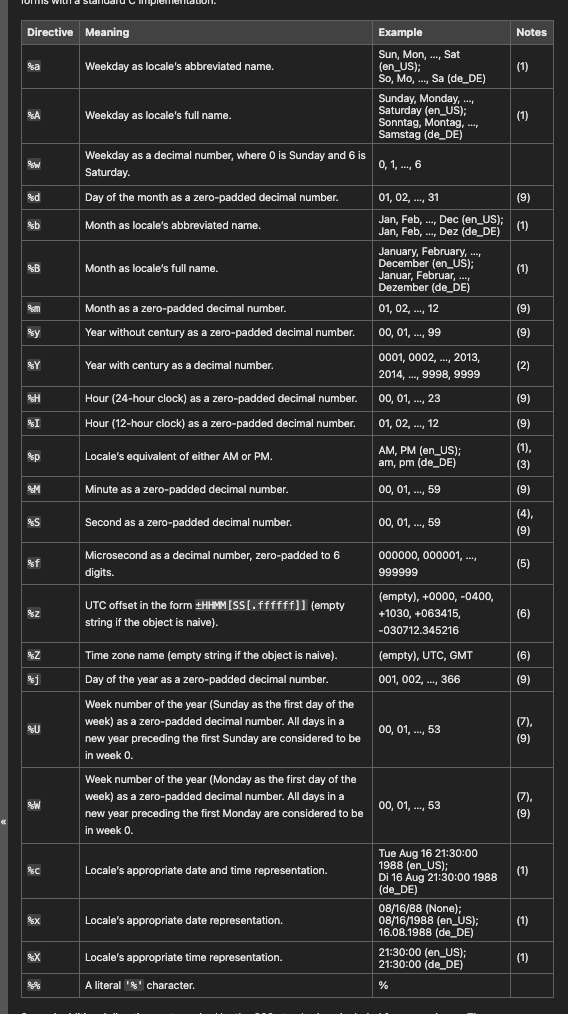

In [69]:
# TALK ABOUT REGEX!!

In [76]:
from datetime import datetime
date_time_str = "28/01/23  08:20:00"
date_time_object = datetime.strptime(date_time_str, "%d/%m/%y %H:%M:%S")
print(date_time_object)
# check date_time_object_type
print(type(date_time_object))


2023-01-28 08:20:00
<class 'datetime.datetime'>


In [78]:
# df = pd.read_csv('data/date_data.csv')
df = pd.read_csv('data/dirty_data_from_w3.csv', sep=' ', quotechar="'")

df['Date'] = pd.to_datetime(df['Date'], format='mixed')
## SANITY CHECK IT IS A TIMESTAMP / DATE TIME OBJECT
print(df.iloc[0]['Date'])
print( type(df.iloc[0]['Date']) )

2020-12-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [79]:
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

df['american_date'] = df['Date'].dt.strftime('%m/%d/%y')
df['written_date'] = df['Date'].dt.strftime('%A, %B %d %Y')
df['written_date']

0       Tuesday, December 01 2020
1     Wednesday, December 02 2020
2      Thursday, December 03 2020
3        Friday, December 04 2020
4      Saturday, December 05 2020
5        Sunday, December 06 2020
6        Monday, December 07 2020
7       Tuesday, December 08 2020
8     Wednesday, December 09 2020
9      Thursday, December 10 2020
10       Friday, December 11 2020
11     Saturday, December 12 2020
12     Saturday, December 12 2020
13       Sunday, December 13 2020
14       Monday, December 14 2020
15      Tuesday, December 15 2020
16    Wednesday, December 16 2020
17     Thursday, December 17 2020
18       Friday, December 18 2020
19     Saturday, December 19 2020
20       Sunday, December 20 2020
21       Monday, December 21 2020
22                            NaN
23    Wednesday, December 23 2020
24     Thursday, December 24 2020
25       Friday, December 25 2020
26     Saturday, December 26 2020
27       Sunday, December 27 2020
28       Monday, December 28 2020
29      Tuesda

# From Zacks Experience at the Presidential Campaign 
* The best format to use for dates is 'YYYYMMDD' 
* for example, '20240826'
* This is because it's easily sortable in string format, its easy to format to a proper datetime object, and '/' and '-' or '.' seperators can just mess things up.   

In [ ]:
# How would we do that format with the Date column?
df.head()

# Columns / Annoying Headers // Delimeters

In [80]:
df = pd.read_csv('data/no_headers.csv')
df.head()

,1\t 1\t one
0,10\t ten\t ten
1,20\t NULL\t
2,99\t 99.0\t nine


In [81]:
df = pd.read_csv('data/no_headers.csv', delimiter='\t')
df.head()

,1,1,one
0,10,ten,ten
1,20,NULL,NaN
2,99,99.0,nine


In [82]:
df = pd.read_csv('data/no_headers.csv', 
                 delimiter='\t', 
                 names=['Column 1', 'Column 2', 'Column 3'])
df.head()



,Column 1,Column 2,Column 3
0,1,1,one
1,10,ten,ten
2,20,NULL,NaN
3,99,99.0,nine


In [83]:
# Best format for columns

df.columns

new_col_names = []

for col in df.columns:
    good_format = col.strip().lower().replace(' ', '_')
    print('old-->', col, '\t new-->', good_format)
    new_col_names.append(good_format)



old--> Column 1 	 new--> column_1
old--> Column 2 	 new--> column_2
old--> Column 3 	 new--> column_3


In [84]:
df.columns = new_col_names
df.head()

,column_1,column_2,column_3
0,1,1,one
1,10,ten,ten
2,20,NULL,NaN
3,99,99.0,nine


In [85]:
# Quickly do renaming collumns 
df = df.rename(columns={'column_1':'first_col'})
df

,first_col,column_2,column_3
0,1,1,one
1,10,ten,ten
2,20,NULL,NaN
3,99,99.0,nine


In [86]:
df = pd.read_csv('data/annoying_headers.csv')
print(df.head())

# HIGHLIGHT THE SPACE BEFORE THE COLUMNS
## ERROR 
print(df.columns)
df["1"]

   column_one   1   one   column-1   column 1
0          11  12    13         14         15
1          22  22    23         24         25
Index(['column_one', ' 1', ' one', ' column-1', ' column 1'], dtype='object')


KeyError: '1'

In [87]:
df = pd.read_csv('data/annoying_headers.csv', 
                 skipinitialspace=True)
print(df.columns)

## NO ERROR
df["1"]


Index(['column_one', '1', 'one', 'column-1', 'column 1'], dtype='object')


0    12
1    22
Name: 1, dtype: int64

# Missing data: NaN / Null / None 
* Finding / Labeling
* Properly formatting them.
* Replacing
* Dropping


In [88]:
df = pd.read_csv('data/mixed_types.csv')
print(df.dtypes)
df

good_strings    object
just_ints        int64
mixed_types     object
just_strings    object
dtype: object


,good_strings,just_ints,mixed_types,just_strings
0,a,1,1,one
1,b,10,one hundred,one hundred
2,c,20,NULL,NaN
3,z,99,99.0,NaN
4,z,100,NaN,NaN
5,z,200,200,MISSING


In [89]:
# NULL, N/A, and MISSING are not NaNs its a string column. But N/A in line 5 is -- why? 
# just_strings ROW 5 we want to make NaN

df.isnull()

,good_strings,just_ints,mixed_types,just_strings
0,False,False,False,False
1,False,False,False,False
2,False,False,False,True
3,False,False,False,True
4,False,False,True,True
5,False,False,False,False


In [90]:
df.isnull().sum()

good_strings    0
just_ints       0
mixed_types     1
just_strings    3
dtype: int64

In [91]:
df = pd.read_csv('data/mixed_types.csv', 
                 na_values=['MISSING', 'NULL'])
df.head()


,good_strings,just_ints,mixed_types,just_strings
0,a,1,1,one
1,b,10,one hundred,one hundred
2,c,20,NULL,NaN
3,z,99,99.0,NaN
4,z,100,NaN,NaN


In [92]:

# just_strings ROW 5 is now a NaN
## BUT mixed_types ROW 2 is not a NaN
### OPEN UP FILE TO INSPECT
#### SEE THAT THERE IS WHITESPACE INFRONT, SO 'NULL' is actuall ' NULL'
print(df.dtypes)
df.isnull()

good_strings    object
just_ints        int64
mixed_types     object
just_strings    object
dtype: object


,good_strings,just_ints,mixed_types,just_strings
0,False,False,False,False
1,False,False,False,False
2,False,False,False,True
3,False,False,False,True
4,False,False,True,True
5,False,False,False,True


In [93]:
df = pd.read_csv('data/mixed_types.csv')

string_cols = ['mixed_types', 'just_strings']
for col in string_cols:
    df[col] = df[col].str.strip()

import numpy as np
df = df.replace('NULL', np.nan)
df


,good_strings,just_ints,mixed_types,just_strings
0,a,1,1,one
1,b,10,one hundred,one hundred
2,c,20,NaN,NaN
3,z,99,99.0,NaN
4,z,100,NaN,NaN
5,z,200,200,MISSING


### If time, do select dtypes by only adding 100 to the numeric columns

# Dropping NaNs

In [94]:
## WHY COULD THIS BE BAD?
df_dropped = df.dropna()
df_dropped

,good_strings,just_ints,mixed_types,just_strings
0,a,1,1,one
1,b,10,one hundred,one hundred
5,z,200,200,MISSING


In [96]:
df.dropna(subset=['mixed_types'])

,good_strings,just_ints,mixed_types,just_strings
0,a,1,1,one
1,b,10,one hundred,one hundred
3,z,99,99.0,NaN
5,z,200,200,MISSING


# Duplicates
    * Sometimes a good idea and not always. 
    * Why was there a duplicate... 
    * Exact duplicate or semi duplicate?

In [97]:

df.drop_duplicates()

,good_strings,just_ints,mixed_types,just_strings
0,a,1,1,one
1,b,10,one hundred,one hundred
2,c,20,NaN,NaN
3,z,99,99.0,NaN
4,z,100,NaN,NaN
5,z,200,200,MISSING


# Data Types
* object / strings
* ints / floats
* mixed

In [98]:
## ERROR!  ten is one hundred a number and 
df['should_be_ints'] = df['mixed_types'].astype(int)

ValueError: invalid literal for int() with base 10: 'one hundred'

In [99]:
df = pd.read_csv('data/mixed_types.csv')

def string_to_number(input_str):
    try:
        return(int(input_str))
    except:
        return None

df['should_be_numbers'] = df.mixed_types.apply(string_to_number)
print(df.dtypes)


## WHY IS 99.9 NOT COVERTED PROPERLY
df

good_strings          object
just_ints              int64
mixed_types           object
just_strings          object
should_be_numbers    float64
dtype: object


,good_strings,just_ints,mixed_types,just_strings,should_be_numbers
0,a,1,1,one,1.0
1,b,10,one hundred,one hundred,NaN
2,c,20,NULL,NaN,NaN
3,z,99,99.0,NaN,NaN
4,z,100,NaN,NaN,NaN
5,z,200,200,MISSING,200.0


In [ ]:
a = '99.0'
int(a)

In [100]:
# AN EVEN EASIER WAY
## "If ‘coerce’, then invalid parsing will be set as NaN."
df['dang_this_is_easy'] = pd.to_numeric(df['mixed_types'], errors='coerce')
df

,good_strings,just_ints,mixed_types,just_strings,should_be_numbers,dang_this_is_easy
0,a,1,1,one,1.0,1.0
1,b,10,one hundred,one hundred,NaN,NaN
2,c,20,NULL,NaN,NaN,NaN
3,z,99,99.0,NaN,NaN,99.0
4,z,100,NaN,NaN,NaN,NaN
5,z,200,200,MISSING,200.0,200.0


In [ ]:
# ### SKIP BUT ANOTHER WAY TO CAST NUMBERS

# ## a much more difficult but expandable way
# ## to do the same thing
# df = pd.read_csv('data/mixed_types.csv', na_values=['MISSING'])

# def string_to_int(input_str):
#     try:
#         return( int(input_str) )
#     except:
#         pass
#     try:
#         return( float(input_str) )
#     except:
#         pass
#     return None

# df['should_be_numbers'] = df.mixed_types.apply(string_to_int)
# print(df.dtypes)


# ## WHY IS 99.9 NOT COVERTED PROPERLY
# df

In [ ]:
# Be careful 

# Filling NaNs

- When to do it and why?
- Case by case decision...


In [ ]:
### Filling NaNs
# Bad way
df.fillna(0)


# better way
df['numbers_filled_na'] = df['dang_this_is_easy'].fillna( df['dang_this_is_easy'].mean() )
df


# Adding new data. 
* adding new column
* appending new rows

In [101]:
### Creating a new column

import random

random_numbers = []
for i in range(len(df)):
    rn = random.random()
    random_numbers.append(rn)
random_numbers

[0.2487952691660299,
 0.761676025230743,
 0.9028891798157304,
 0.9983844432467791,
 0.36797256371453624,
 0.9919168847406619]

#### Rounding Numbers  

In [102]:
df['random_numbs'] = random_numbers
df.head()

,good_strings,just_ints,mixed_types,just_strings,should_be_numbers,dang_this_is_easy,random_numbs
0,a,1,1,one,1.0,1.0,0.248795
1,b,10,one hundred,one hundred,NaN,NaN,0.761676
2,c,20,NULL,NaN,NaN,NaN,0.902889
3,z,99,99.0,NaN,NaN,99.0,0.998384
4,z,100,NaN,NaN,NaN,NaN,0.367973


In [103]:
df['rounded_numbs'] = df.random_numbs.round(2)
df

,good_strings,just_ints,mixed_types,just_strings,should_be_numbers,dang_this_is_easy,random_numbs,rounded_numbs
0,a,1,1,one,1.0,1.0,0.248795,0.25
1,b,10,one hundred,one hundred,NaN,NaN,0.761676,0.76
2,c,20,NULL,NaN,NaN,NaN,0.902889,0.90
3,z,99,99.0,NaN,NaN,99.0,0.998384,1.00
4,z,100,NaN,NaN,NaN,NaN,0.367973,0.37
5,z,200,200,MISSING,200.0,200.0,0.991917,0.99


In [104]:
new_row = {    
    'good_strings':'defg', 
    'just_ints': 1, 
    'mixed_types': 1, 
    'just_strings': 'one', 
    'random_numbs': 1.111111, 
    'rounded_numbs': 1.11111
    }

new_df = pd.DataFrame([new_row])
new_df

pd.concat([df, new_df])


,good_strings,just_ints,mixed_types,just_strings,should_be_numbers,dang_this_is_easy,random_numbs,rounded_numbs
0,a,1,1,one,1.0,1.0,0.248795,0.25000
1,b,10,one hundred,one hundred,NaN,NaN,0.761676,0.76000
2,c,20,NULL,NaN,NaN,NaN,0.902889,0.90000
3,z,99,99.0,NaN,NaN,99.0,0.998384,1.00000
4,z,100,NaN,NaN,NaN,NaN,0.367973,0.37000
5,z,200,200,MISSING,200.0,200.0,0.991917,0.99000
0,defg,1,1,one,NaN,NaN,1.111111,1.11111


In [105]:
new_rows = {    
    'good_strings': ['x', 'y'], 
    'just_ints': [22, 23], 
    'mixed_types': [1, 'two'], 
    'just_strings': ['one', 'another'], 
    'random_numbs': [1.111111, 2.222], 
    'rounded_numbs': [1.1, 2.2]
    }

# Same exact thing
pd.DataFrame(new_rows) 
pd.DataFrame.from_dict(new_rows)

,good_strings,just_ints,mixed_types,just_strings,random_numbs,rounded_numbs
0,x,22,1,one,1.111111,1.1
1,y,23,two,another,2.222000,2.2


### DataFames to and from JSONS / dictionaies. 

In [106]:
df = pd.read_csv('data/mixed_types.csv', 
                 na_values=['MISSING', 'NULL'])
df.head()


,good_strings,just_ints,mixed_types,just_strings
0,a,1,1,one
1,b,10,one hundred,one hundred
2,c,20,NULL,NaN
3,z,99,99.0,NaN
4,z,100,NaN,NaN


In [107]:
df.to_dict()

{'good_strings': {0: 'a', 1: 'b', 2: 'c', 3: 'z', 4: 'z', 5: 'z'},
 'just_ints': {0: 1, 1: 10, 2: 20, 3: 99, 4: 100, 5: 200},
 'mixed_types': {0: ' 1',
  1: ' one hundred',
  2: ' NULL',
  3: ' 99.0',
  4: nan,
  5: '200'},
 'just_strings': {0: ' one',
  1: ' one hundred',
  2: nan,
  3: nan,
  4: nan,
  5: nan}}

In [108]:
df.to_dict(orient='records')

[{'good_strings': 'a',
  'just_ints': 1,
  'mixed_types': ' 1',
  'just_strings': ' one'},
 {'good_strings': 'b',
  'just_ints': 10,
  'mixed_types': ' one hundred',
  'just_strings': ' one hundred'},
 {'good_strings': 'c',
  'just_ints': 20,
  'mixed_types': ' NULL',
  'just_strings': nan},
 {'good_strings': 'z',
  'just_ints': 99,
  'mixed_types': ' 99.0',
  'just_strings': nan},
 {'good_strings': 'z',
  'just_ints': 100,
  'mixed_types': nan,
  'just_strings': nan},
 {'good_strings': 'z',
  'just_ints': 200,
  'mixed_types': '200',
  'just_strings': nan}]

In [109]:
json = [
    {
      "City": "Berlin",
      "CompanyName": "Alfreds Futterkiste",
      "ContactName": "Maria Anders",
      "Relationship": "Customers"
    },
    {
      "City": "México D.F.",
      "CompanyName": "Ana Trujillo Emparedados y helados",
      "ContactName": "Ana Trujillo",
      "Relationship": "Customers"
    },
    {
      "City": "México D.F.",
      "CompanyName": "Antonio Moreno Taquería",
      "ContactName": "Antonio Moreno",
      "Relationship": "Customers"
    }
  ]



In [110]:
pd.read_json('data/cities.json')

,City,CompanyName,ContactName,Relationship
0,Berlin,Alfreds Futterkiste,Maria Anders,Customers
1,México D.F.,Ana Trujillo Emparedados y helados,Ana Trujillo,Customers
2,México D.F.,Antonio Moreno Taquería,Antonio Moreno,Customers


# Mapping data.  
### Map values from a dictionary to a column. 

In [116]:
mapping_dict = {
    'a': 'front',
    'b': 'front',
    'z': 'back'
}

# With NaNs
df['mapped_data_nans'] = df.good_strings.map(mapping_dict)

# Without NaNs
df['mapped_data'] = df.good_strings.replace(mapping_dict)
df.head()

,good_strings,just_ints,mixed_types,just_strings,mapped_data,mapped_data_nans
0,a,1,1,one,front,front
1,b,10,one hundred,one hundred,front,front
2,c,20,NULL,NaN,c,NaN
3,z,99,99.0,NaN,back,back
4,z,100,NaN,NaN,back,back


### Iterating through rows



In [117]:
df.head()

,good_strings,just_ints,mixed_types,just_strings,mapped_data,mapped_data_nans
0,a,1,1,one,front,front
1,b,10,one hundred,one hundred,front,front
2,c,20,NULL,NaN,c,NaN
3,z,99,99.0,NaN,back,back
4,z,100,NaN,NaN,back,back


In [118]:
for ix, row in df.iterrows():
    print(ix)
    print(row)
    break

0
good_strings            a
just_ints               1
mixed_types             1
just_strings          one
mapped_data         front
mapped_data_nans    front
Name: 0, dtype: object


In [119]:
for ix, row in df.iterrows():
    print('Hello', ix, row['just_ints'])

Hello 0 1
Hello 1 10
Hello 2 20
Hello 3 99
Hello 4 100
Hello 5 200


In [120]:
for ix, row in df.iterrows():
    if row['mixed_types'] == 'one hundred':
        print(row)
        row['mixed_types'] = 100
df.head()

,good_strings,just_ints,mixed_types,just_strings,mapped_data,mapped_data_nans
0,a,1,1,one,front,front
1,b,10,one hundred,one hundred,front,front
2,c,20,NULL,NaN,c,NaN
3,z,99,99.0,NaN,back,back
4,z,100,NaN,NaN,back,back


In [121]:
for ix, row in df.iterrows():
    if row['mixed_types'] == 'one hundred':
        df.at[ix, 'mixed_types'] = 100
df.head()

,good_strings,just_ints,mixed_types,just_strings,mapped_data,mapped_data_nans
0,a,1,1,one,front,front
1,b,10,one hundred,one hundred,front,front
2,c,20,NULL,NaN,c,NaN
3,z,99,99.0,NaN,back,back
4,z,100,NaN,NaN,back,back


In [ ]:
## we made a small but big 'bad practice blunder' in the last cell
### WHO CAN SPOT IT? 

In [122]:
df['just_strings'].replace('one hundred', 100)
df

,good_strings,just_ints,mixed_types,just_strings,mapped_data,mapped_data_nans
0,a,1,1,one,front,front
1,b,10,one hundred,one hundred,front,front
2,c,20,NULL,NaN,c,NaN
3,z,99,99.0,NaN,back,back
4,z,100,NaN,NaN,back,back
5,z,200,200,NaN,back,back


### EXPORTING DATA


In [123]:
df.to_csv('data/exported.csv')

exported_df = pd.read_csv('data/exported.csv')
exported_df.head()


,Unnamed: 0,good_strings,just_ints,mixed_types,just_strings,mapped_data,mapped_data_nans
0,0,a,1,1,one,front,front
1,1,b,10,one hundred,one hundred,front,front
2,2,c,20,NULL,NaN,c,NaN
3,3,z,99,99.0,NaN,back,back
4,4,z,100,NaN,NaN,back,back


In [124]:
df.to_csv('data/exported.csv', index=False)

exported_df = pd.read_csv('data/exported.csv')
exported_df


,good_strings,just_ints,mixed_types,just_strings,mapped_data,mapped_data_nans
0,a,1,1,one,front,front
1,b,10,one hundred,one hundred,front,front
2,c,20,NULL,NaN,c,NaN
3,z,99,99.0,NaN,back,back
4,z,100,NaN,NaN,back,back
5,z,200,200,NaN,back,back


# Loading large datafiles
* you can load compressed files
* low_memory=False
* nrows

## Pipelining

In [ ]:
# df = pd.read_csv('data/dirty_data_from_w3.csv', 
#                  sep=' ', quotechar="'")
# df

# Knowing your data.
- iris sepals
- data dictionary
- dont make up about your data
